## Exercise 1

In [ ]:
# Libraries importation
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.utils import np_utils

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000, 784)
313/313 [==============================] - 3s 8ms/step - loss: 0.5898 - accuracy: 0.8654
Test accuracy: 0.8654000163078308
(100, 784)


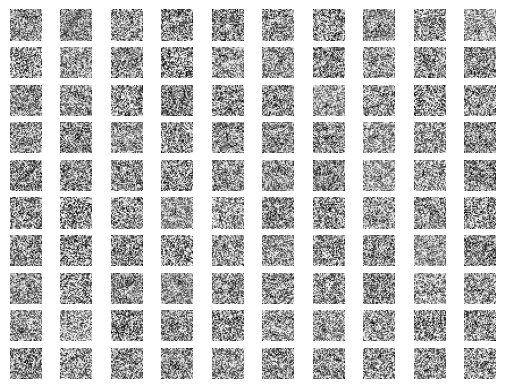

In [ ]:
(X_train,Y_train), (X_test,Y_test)=mnist.load_data() 
print(X_train.shape) 
X_train=X_train.reshape(60000,784) 
X_test=X_test.reshape(10000,784)

print(X_train.shape) 
classes=10

Y_train=np_utils.to_categorical(Y_train,classes) 
Y_test=np_utils.to_categorical(Y_test,classes)

input_size=784
batch_size=100

hidden_neurons=100 
hidden_neurons=100

model=Sequential([ Dense(hidden_neurons,input_dim=input_size), 
                  Activation('sigmoid'), 
                  Dense(classes), 
                  Activation('softmax')])
model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='sgd')
model.fit(X_train,Y_train,batch_size=batch_size,verbose=1) 
score=model.evaluate(X_test,Y_test,verbose=1)

print('Test accuracy:',score[1])
weights=model.layers[0].get_weights()

fig=plt.figure()
w=weights[0].T
print(w.shape)

for neuron in range(hidden_neurons):
    ax=fig.add_subplot(10,10,neuron+1)
    ax.axis("off")
    ax.imshow(numpy.reshape(w[neuron], (28,28)),cmap=cm.Greys_r)

plt.savefig("neuron_images.png",dpi=300)
plt.show()

## Exercise 2

In [ ]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import random
import numpy

(50000, 32, 32, 3)
(50000, 3072)
Epoch 1/15
500/500 [==============================] - 42s 84ms/step - loss: 2.1836 - accuracy: 0.1820 - val_loss: 2.0907 - val_accuracy: 0.2153
Epoch 2/15
500/500 [==============================] - 30s 59ms/step - loss: 2.0269 - accuracy: 0.2471 - val_loss: 1.9845 - val_accuracy: 0.2799
Epoch 3/15
500/500 [==============================] - 29s 58ms/step - loss: 1.9572 - accuracy: 0.2868 - val_loss: 1.9176 - val_accuracy: 0.2988
Epoch 4/15
500/500 [==============================] - 29s 59ms/step - loss: 1.9146 - accuracy: 0.3041 - val_loss: 1.8903 - val_accuracy: 0.3139
Epoch 5/15
500/500 [==============================] - 31s 61ms/step - loss: 1.8820 - accuracy: 0.3189 - val_loss: 1.8494 - val_accuracy: 0.3335
Epoch 6/15
500/500 [==============================] - 31s 63ms/step - loss: 1.8397 - accuracy: 0.3348 - val_loss: 1.8086 - val_accuracy: 0.3506
Epoch 7/15
500/500 [==============================] - 30s 60ms/step - loss: 1.8067 - accuracy: 0.3474 -

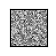

In [ ]:
(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()
print(X_train.shape)
X_train=X_train.reshape(50000,3072)
X_test=X_test.reshape(10000,3072)
print(X_train.shape)

classes=10
Y_train=np_utils.to_categorical(Y_train,classes)
Y_test=np_utils.to_categorical (Y_test,classes)

input_size=3072
batch_size=100
epochs=15

model=Sequential([
                  Dense(1024,input_dim=input_size),
                  Activation('relu'),
                  Dense(512),
                  Activation('relu'),
                  Dense(512),
                  Activation('sigmoid'),
                  Dense(classes),
                  Activation('softmax')])
model.compile(loss="categorical_crossentropy",metrics=['accuracy'],optimizer="sgd")
model.fit(X_train,Y_train, batch_size=batch_size,epochs=epochs,validation_data=(X_test,Y_test),verbose=1)

fig=plt.figure() 
outer_grid=gridspec.GridSpec(10,10,wspace=0.0,hspace=0.0)
weights=model.layers[0].get_weights()
w=weights[0].T
print(w.shape)

for i,neuron in enumerate(random.sample(range(0,1023),100)):
    ax=plt.Subplot(fig,outer_grid[i])
    ax.imshow (numpy.mean(numpy.reshape(w[i],(32,32,3)),axis=2),cmap=cm.Greys_r)
    ax.set_xticks([])
    ax.set_yticks([])

fig.add_subplot(ax) 
plt.show()